In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

In [7]:
data = pd.read_csv("sentences.csv")
data

,Unnamed: 0,Sentence
0,0,"отец думал, что мать побоится ночной сырости; ..."
1,1,для меня опять готовилось новое зрелище; отлож...
2,2,"небо сверкало звездами, воздух был наполнен бл..."
3,3,"я видел, будто сквозь сон, как он садился, как..."
4,4,"степь, то есть безлесная и волнообразная беско..."
...,...,...
939,939,"мы остановились на том самом месте, где вчера ..."
940,940,это было первое мною виденное степное укреплен...
941,941,"вид со степи на укрепление грустнее еще, нежел..."
942,942,первые листки свои из степи он еще кое-как раз...


In [8]:
sents_list = data.Sentence.to_list()
len(sents_list)

944

In [11]:
n_samples = 944 # размер корпуса
n_features = 100 # максимальное количество слов в матрице "документы х слова" (= top1000 частотных из всех в корпусе)
n_components = 3 # число тем в корпусе
n_top_words = 10 # порог частотности для визуализаций

In [18]:
st = stopwords.words('russian')

In [16]:
tf_vectorizer = CountVectorizer(max_df = 0.7, min_df = 5, # игнорируем слова,которые только в 1 доке или в 95% документов.
                                max_features = n_features,
                               stop_words = st)

X_tf = tf_vectorizer.fit_transform(sents_list)

In [19]:
display(X_tf.shape) # матрица "документы x слова" 
tf_vectorizer.get_feature_names_out()[85:90] # вывести слова с 85 по 89

(944, 100)

array(['степям', 'степями', 'степях', 'стороне', 'сторону'], dtype=object)

In [62]:
lsa_model = TruncatedSVD(n_components = n_components)
# lsa_topic_matrix = lsa_model.fit_transform(X_tf)

In [22]:
# lsa_topic_matrix.shape

(944, 3)

In [65]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    fig, axes = plt.subplots(1, 5, figsize=(30, 15)) # параметры отображения 
    axes = axes.flatten()
    all_features = {} # словарь для сохранения ключевых слов для тем
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1] 
        top_features = [feature_names[i] for i in top_features_ind]
        # строка для сохранения темы и слов в словарь
        
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.show()

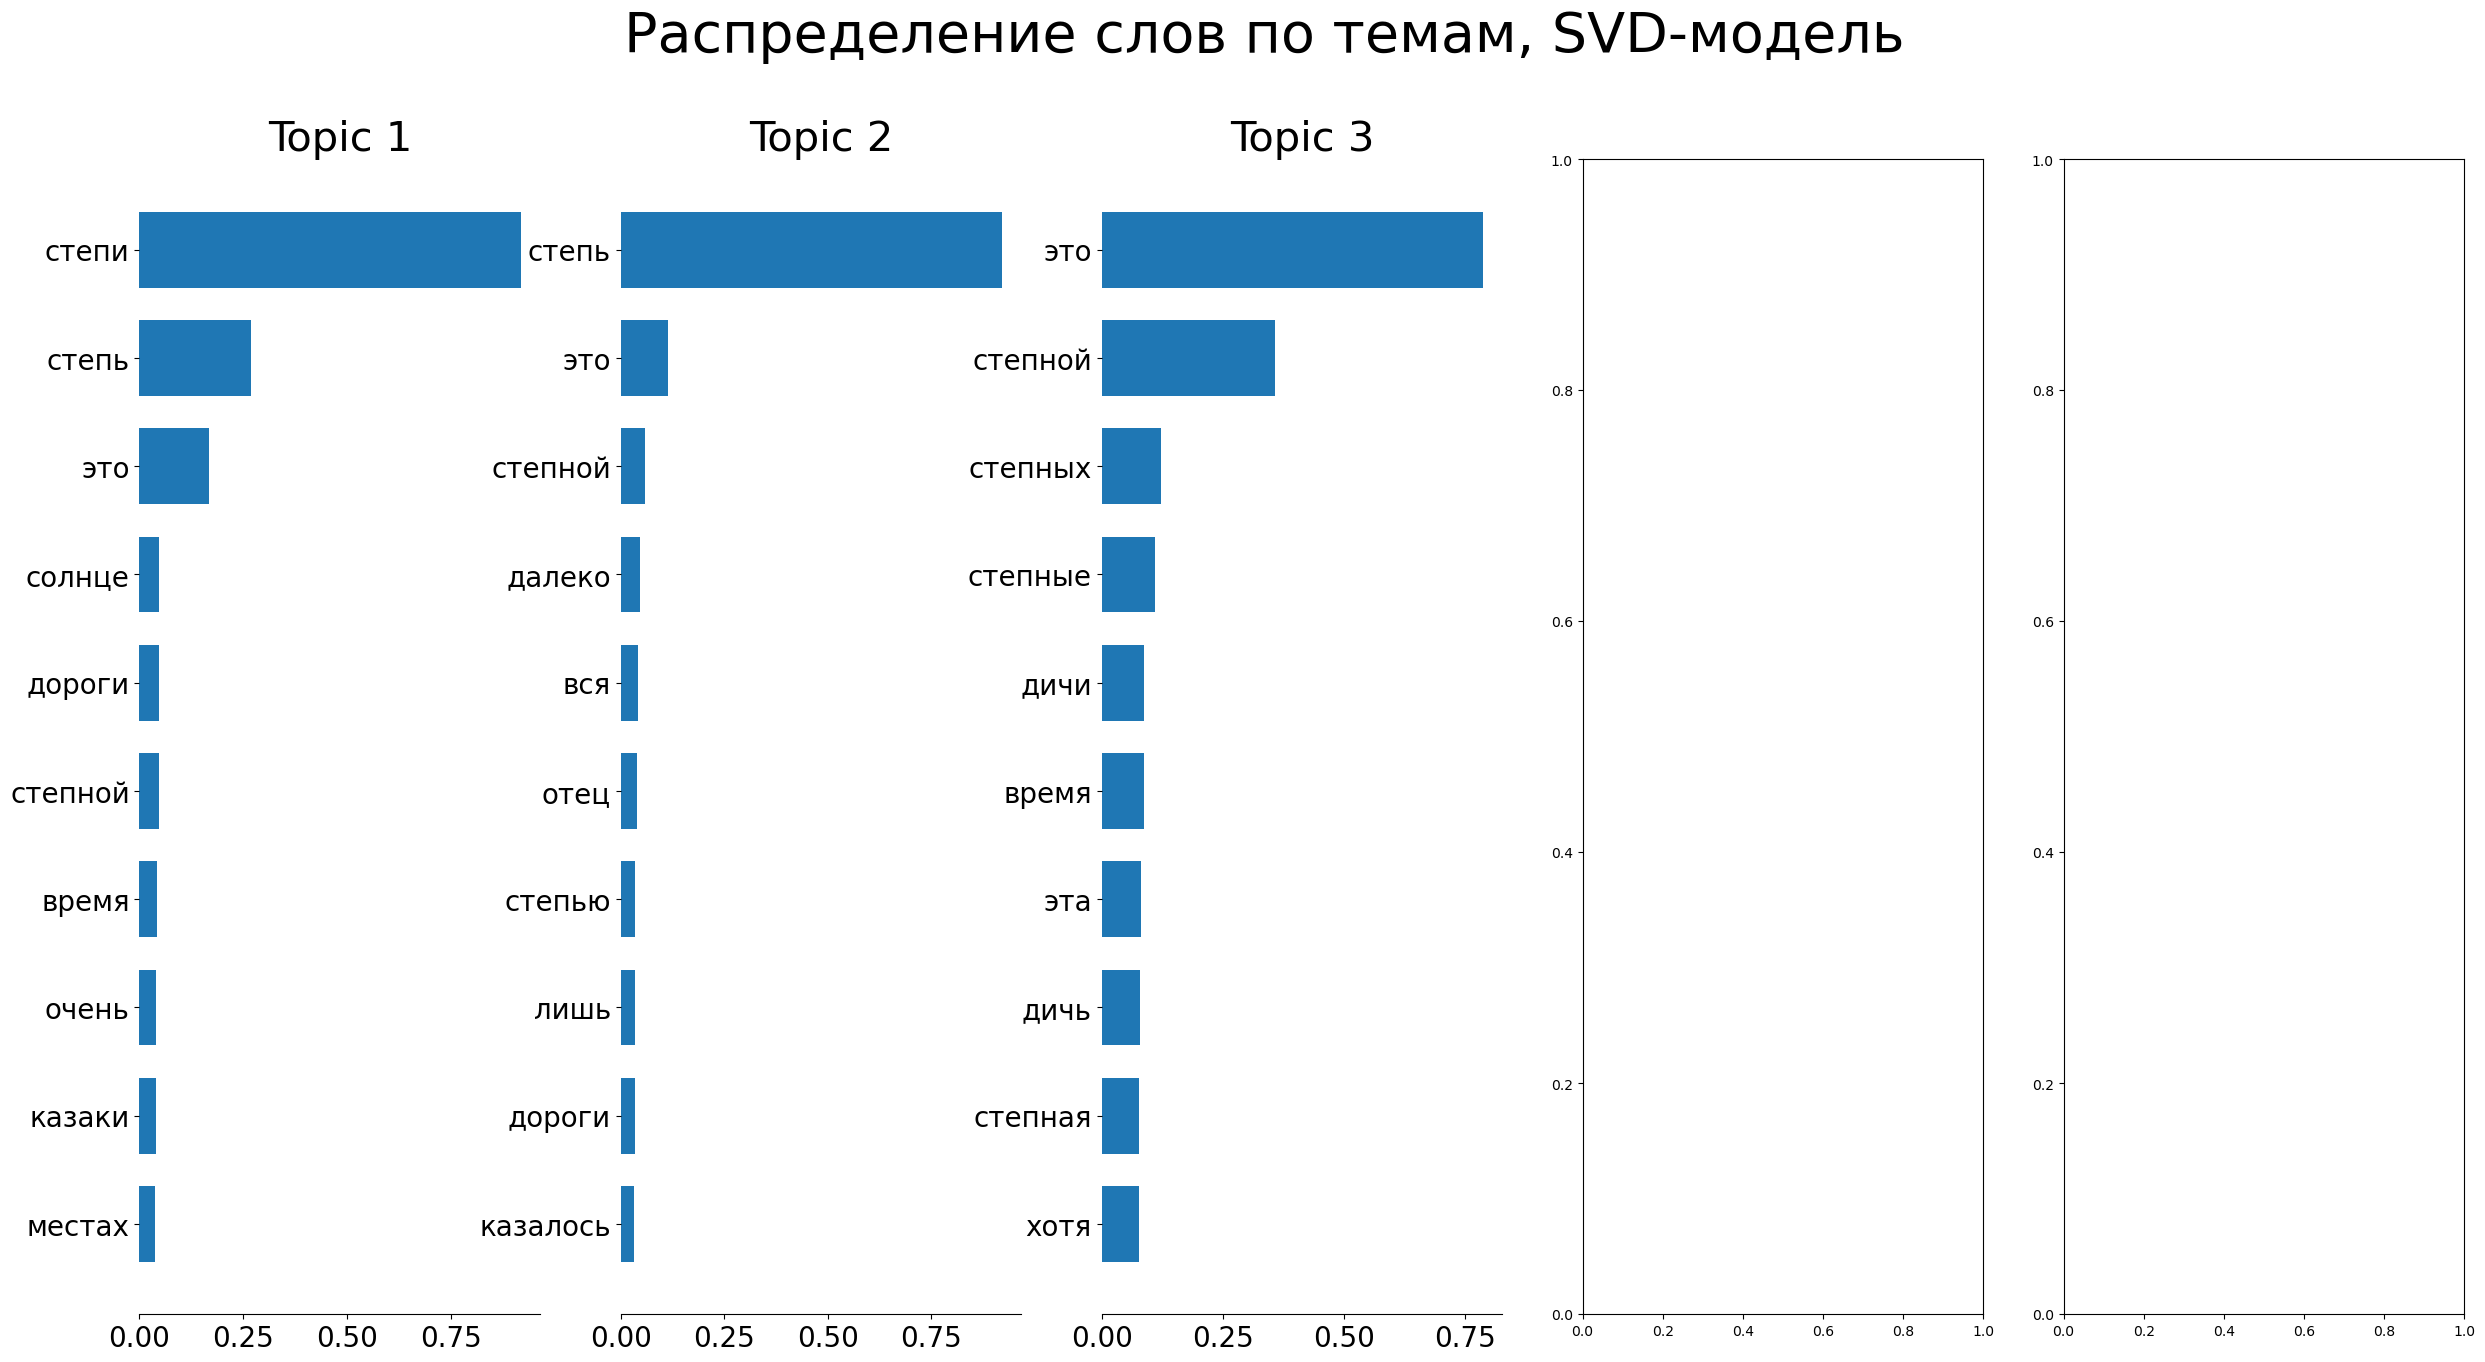

In [27]:
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lsa_model, tf_feature_names, n_top_words, 'Распределение слов по темам, SVD-модель')

In [28]:
for n in range(lsa_topic_matrix.shape[0]):
    topic_most_pr = lsa_topic_matrix[n].argmax()+1 
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

doc: 0 topic: 2

doc: 1 topic: 3

doc: 2 topic: 3

doc: 3 topic: 1

doc: 4 topic: 2

doc: 5 topic: 2

doc: 6 topic: 3

doc: 7 topic: 3

doc: 8 topic: 3

doc: 9 topic: 3

doc: 10 topic: 3

doc: 11 topic: 1

doc: 12 topic: 1

doc: 13 topic: 1

doc: 14 topic: 3

doc: 15 topic: 2

doc: 16 topic: 3

doc: 17 topic: 1

doc: 18 topic: 3

doc: 19 topic: 3

doc: 20 topic: 3

doc: 21 topic: 3

doc: 22 topic: 3

doc: 23 topic: 3

doc: 24 topic: 2

doc: 25 topic: 3

doc: 26 topic: 2

doc: 27 topic: 2

doc: 28 topic: 2

doc: 29 topic: 2

doc: 30 topic: 2

doc: 31 topic: 3

doc: 32 topic: 1

doc: 33 topic: 2

doc: 34 topic: 3

doc: 35 topic: 2

doc: 36 topic: 3

doc: 37 topic: 3

doc: 38 topic: 3

doc: 39 topic: 3

doc: 40 topic: 3

doc: 41 topic: 3

doc: 42 topic: 3

doc: 43 topic: 1

doc: 44 topic: 1

doc: 45 topic: 1

doc: 46 topic: 3

doc: 47 topic: 3

doc: 48 topic: 3

doc: 49 topic: 3

doc: 50 topic: 1

doc: 51 topic: 3

doc: 52 topic: 3

doc: 53 topic: 3

doc: 54 topic: 2

doc: 55 topic: 3

do

# Научные тексты

In [72]:
sci_texts = pd.read_csv("science.csv")
sci_texts

,Author,Title,Year,File
0,С. Ш. Аязбекова,ВЕЛИКАЯ СТЕПЬ: ТЕНГРИАНСКАЯ ЦИВИЛИЗАЦИЯ И БУДДИЗМ,2023,velikaya_steppe.txt
1,А. А. Чибилёв,ГЕОГРАФИЧЕСКИЕ АСПЕКТЫ РАЗВИТИЯ ЗАПОВЕДНОЙ СИС...,2022,geograficheskiye_aspekty.txt
2,Ю.А. Лысенко,Подготовка нормативно-правового и организацион...,2023,kazahskaya_shkola.txt
3,И.М. Габбасова,ИЗМЕНЕНИЕ КЛИМАТА И РИСК ДЕГРАДАЦИИ ПОЧВ В ЗАУ...,2023,izmeneniye klimata.txt
4,О.В. Юсупова,К характеристике ценопопуляций Stipa pennata L...,2022,Stipa_Pennata.txt
5,Е.В. Барбазюк,О РАСПРОСТРАНЕНИИ И ГНЕЗДОВАНИИ СТЕПНЫХ ОРЛОВ ...,2009,Aquila_Rapax.txt
6,А.А. Чибилев,ОСОБЕННОСТИ РАССЕЛЕНИЯ НАСЕЛЕНИЯ ОРЕНБУРГСКОЙ ...,2022,rasseleniye_naseleniya.txt
7,М.К. Карапетян,ПИЩЕВЫЕ ТРАДИЦИИ ПО ДАННЫМ МУЛЬТИДИСЦИПЛИНАРНЫ...,2023,pischeviye_tradicii.txt
8,Ю.А. Гулянов,ПРОБЛЕМЫ АДАПТАЦИИ СТЕПНОГО ЗЕМЛЕПОЛЬЗОВАНИЯ К...,2022,problemy_adaptacii.txt
9,А.А. Выборнов,ПРОБЛЕМЫ ИЗУЧЕНИЯ ПЕРИОДИЗАЦИИ НЕОЛИТА–ЭНЕОЛИТ...,2023,neolit_eneolit.txt


In [73]:
index2 = list(range(0,len(sci_texts)))
files_sci = []
for i in index2:
    f = sci_texts.iloc [i]['File']
    files_sci.append(f)

In [74]:
texts_sci = [] # предобработанные тексты
for i in files_sci:
    with open(i, "r", encoding='utf-8') as open_file:
        text = open_file.read() # чтение файла
        text = text.lower() # приведение к нижнему регистру
        text = text.replace("\n", " ") # удаление лишних символов
        text = text.replace("\xa0", "") # удаление лишних символов
        text = text.replace("\t\t", "")
#         text = text.replace("-то", " -то")
#         text = text.translate(str.maketrans("", "", string.punctuation)) # удаление пунктуации
        texts_sci.append(text)        

In [75]:
target_sent_sci = [] #список предложений со словом степь и его производными
for i in texts_sci:
    sentence = sent_tokenize(i)
    for j in sentence:
        result = re.search(r'[С,с]теп[ьиян].{0,2}|[С,с]тепей', j)
        if not result == None:
            target_sent_sci.append(j) # finding sentences with a target word and its derivatives and adding target sentences into the list 
# target_sent_sci[0:20]

In [76]:
len(target_sent_sci)

1234

In [77]:
sents2 = pd.DataFrame(target_sent_sci)
sents2.columns = ['Sentence']

sents2.to_csv('sentences_sci.csv', encoding = "utf-8") 

In [70]:
# sents2.shape

(1234, 1)

In [58]:
n_samples = 1234 # размер корпуса
n_features = 100 # максимальное количество слов в матрице "документы х слова" (= top1000 частотных из всех в корпусе)
n_components = 3 # число тем в корпусе
n_top_words = 10 # порог частотности для визуализаций

In [59]:
tf_vectorizer2 = CountVectorizer(max_df = 0.7, min_df = 5, # игнорируем слова,которые только в 1 доке или в 95% документов.
                                 max_features = n_features,
                                 stop_words = st)

X_tf2 = tf_vectorizer2.fit_transform(target_sent_sci)

In [60]:
display(X_tf2.shape) # матрица "документы x слова" 
tf_vectorizer2.get_feature_names_out()[71:77] # вывести слова с 85 по 89

(1234, 100)

array(['степной', 'степном', 'степные', 'степных', 'степь', 'степях'],
      dtype=object)

In [63]:
lsa_topic_matrix2 = lsa_model.fit_transform(X_tf2)
lsa_topic_matrix2.shape

(1234, 3)

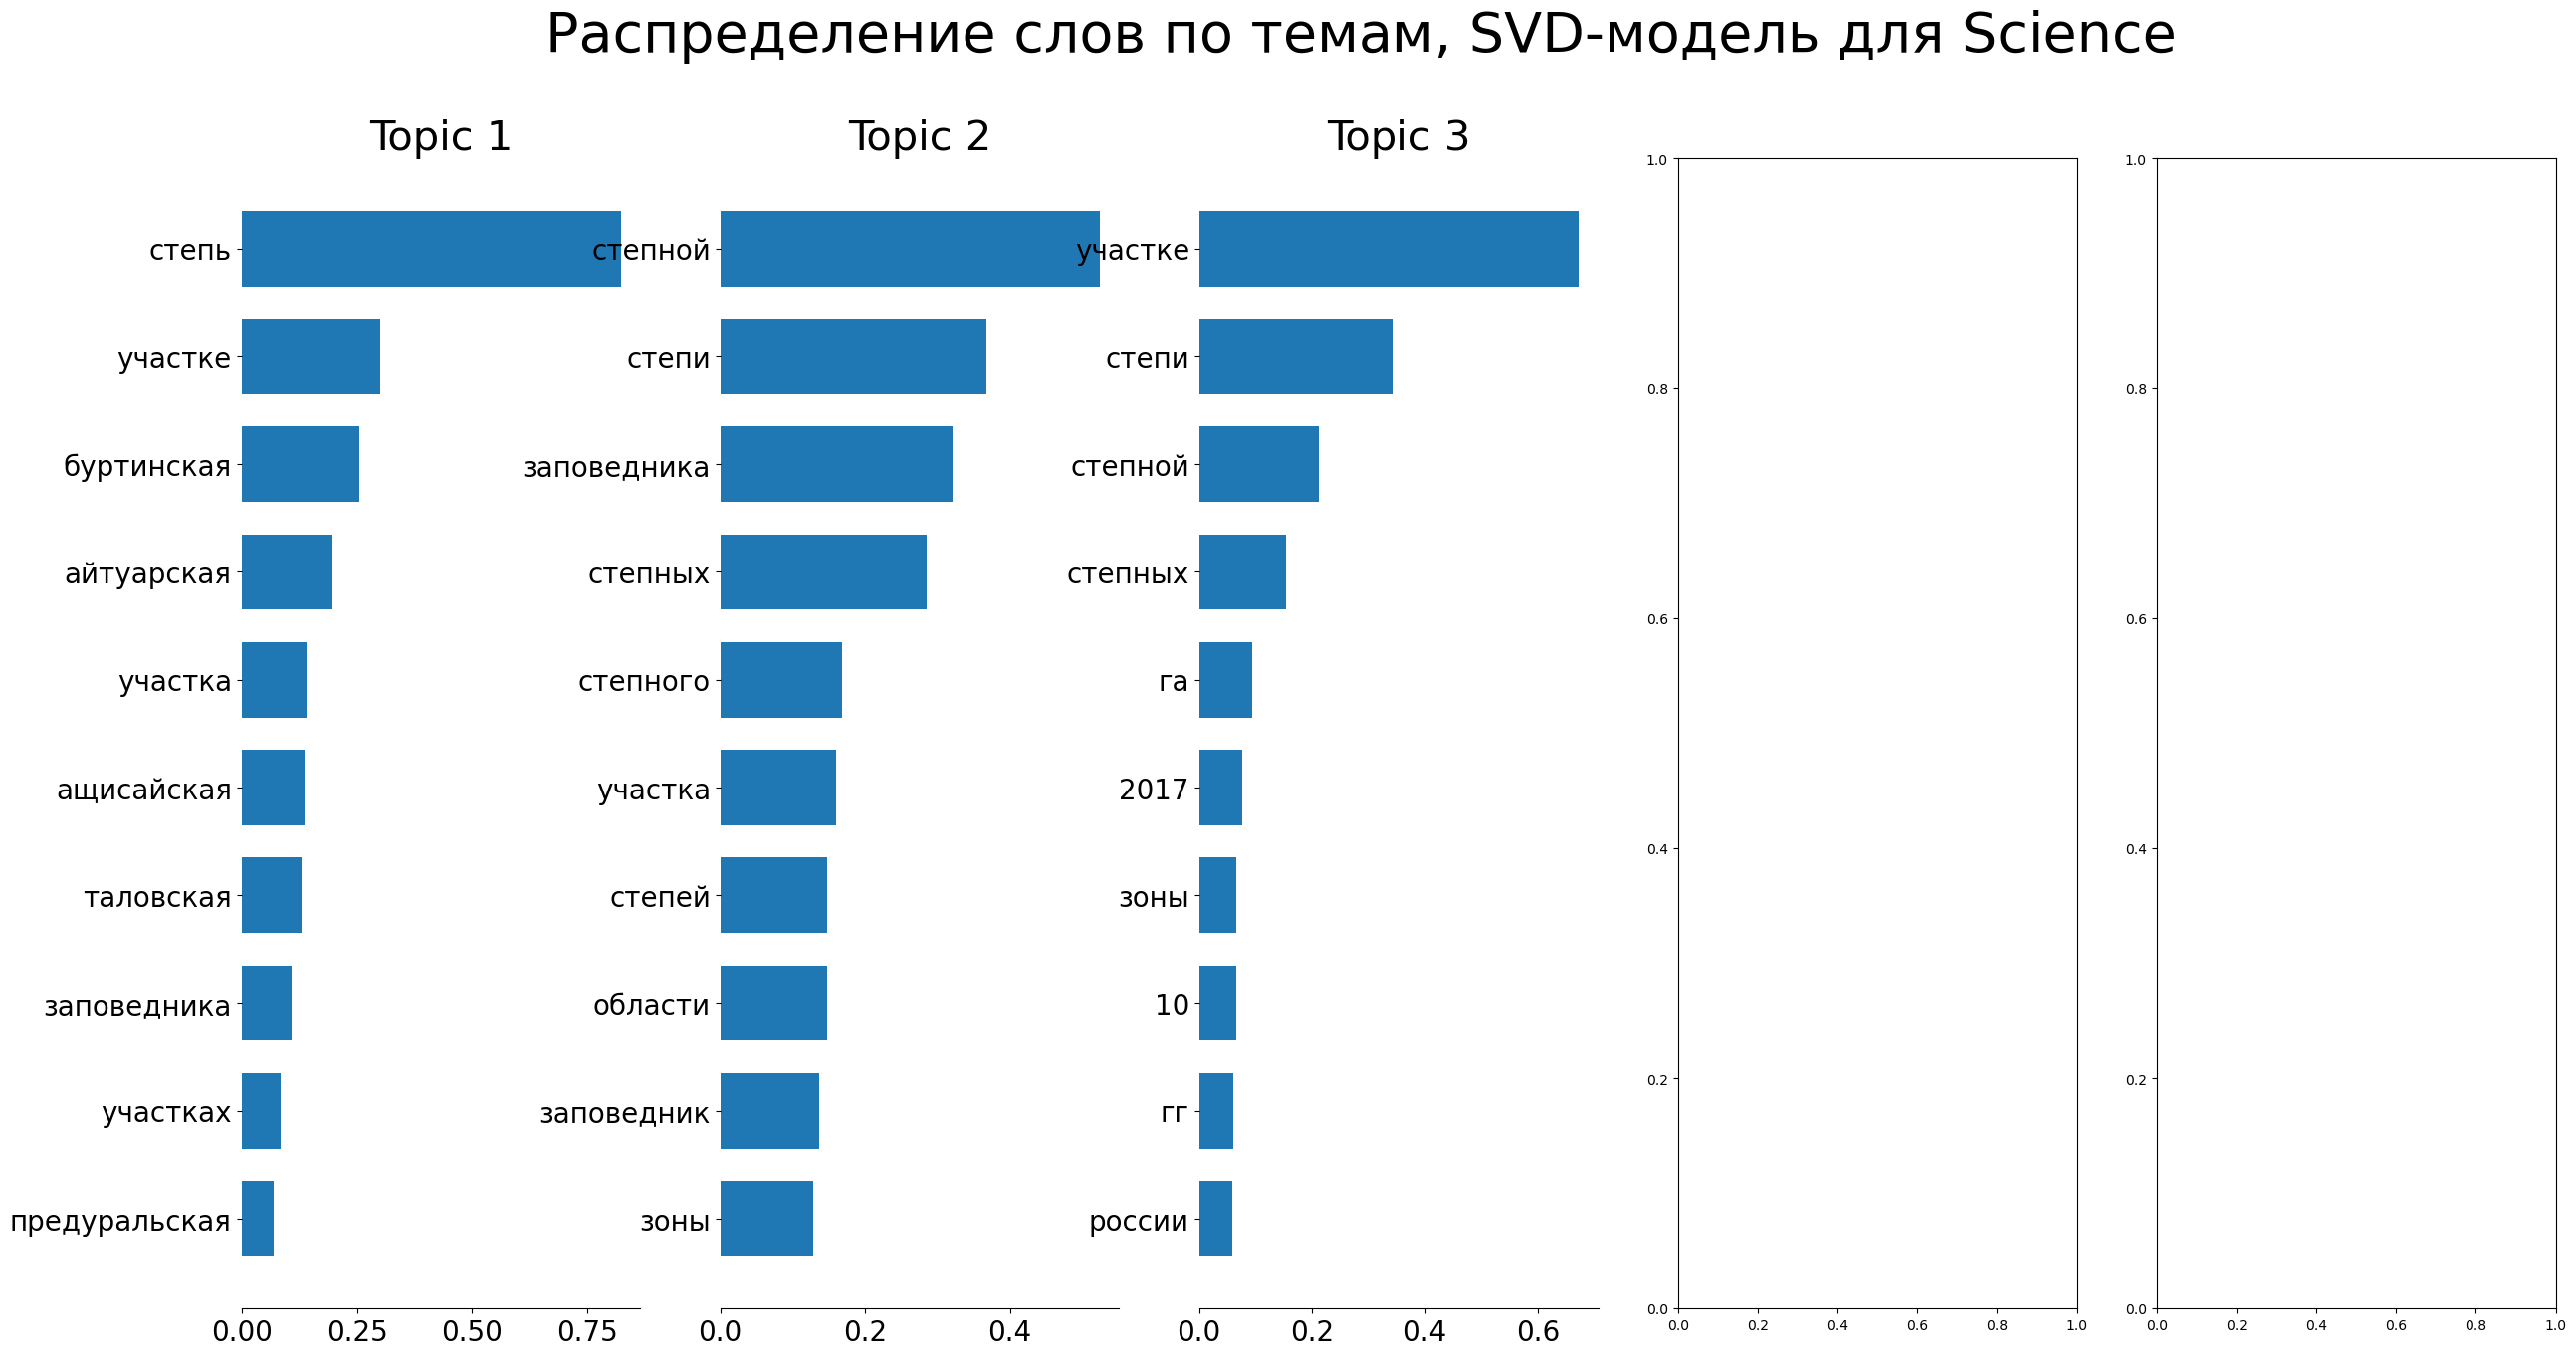

In [68]:
tf_feature_names2 = tf_vectorizer2.get_feature_names_out()
plot_top_words(lsa_model, tf_feature_names2, n_top_words, 'Распределение слов по темам, SVD-модель для Science')

In [67]:
for n in range(lsa_topic_matrix2.shape[0]):
    topic_most_pr2 = lsa_topic_matrix2[n].argmax()+1 
    print("doc: {} topic: {}\n".format(n,topic_most_pr2))

doc: 0 topic: 1

doc: 1 topic: 2

doc: 2 topic: 1

doc: 3 topic: 1

doc: 4 topic: 1

doc: 5 topic: 1

doc: 6 topic: 1

doc: 7 topic: 2

doc: 8 topic: 2

doc: 9 topic: 1

doc: 10 topic: 2

doc: 11 topic: 2

doc: 12 topic: 2

doc: 13 topic: 2

doc: 14 topic: 2

doc: 15 topic: 1

doc: 16 topic: 2

doc: 17 topic: 2

doc: 18 topic: 2

doc: 19 topic: 2

doc: 20 topic: 2

doc: 21 topic: 2

doc: 22 topic: 1

doc: 23 topic: 2

doc: 24 topic: 2

doc: 25 topic: 2

doc: 26 topic: 2

doc: 27 topic: 2

doc: 28 topic: 2

doc: 29 topic: 2

doc: 30 topic: 2

doc: 31 topic: 2

doc: 32 topic: 2

doc: 33 topic: 2

doc: 34 topic: 2

doc: 35 topic: 2

doc: 36 topic: 2

doc: 37 topic: 3

doc: 38 topic: 3

doc: 39 topic: 3

doc: 40 topic: 2

doc: 41 topic: 2

doc: 42 topic: 3

doc: 43 topic: 2

doc: 44 topic: 3

doc: 45 topic: 2

doc: 46 topic: 2

doc: 47 topic: 2

doc: 48 topic: 2

doc: 49 topic: 2

doc: 50 topic: 2

doc: 51 topic: 3

doc: 52 topic: 2

doc: 53 topic: 1

doc: 54 topic: 3

doc: 55 topic: 2

do